# List 3, variant 15 - Tobiasz Wojnar
### Digital Signal Processing 2024/25
### University of Bielsko-Biala, semestr 1

## Task (Variant 15)
- Design an FIR filter with the following coefficients and implement it in Python to reduce noise in a noisy sinusoidal signal. 
FIR Filter Coefficients: $$b = {0.2, 0.3, 0.5}$$

- Design an IIR filter with the following coefficients and implement it in Python to reduce
noise in the same noisy sinusoidal signal.
IIR Filter Coefficients: $$b = {1, 0.5}, a = {1, −0.7}$$


- Implement an adaptive LMS filter in Python with a step size $\mu = 0.05$ and filter length
$M = 6$ to reduce noise in the same noisy sinusoidal signal.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

In [13]:
fir_b = [ 0.2,  0.3, 0.5]

iir_b = [ 1.0,  0.5 ]
iir_a = [ 1.0, -0.7 ]

lms_mu = 0.05
lms_m = 6

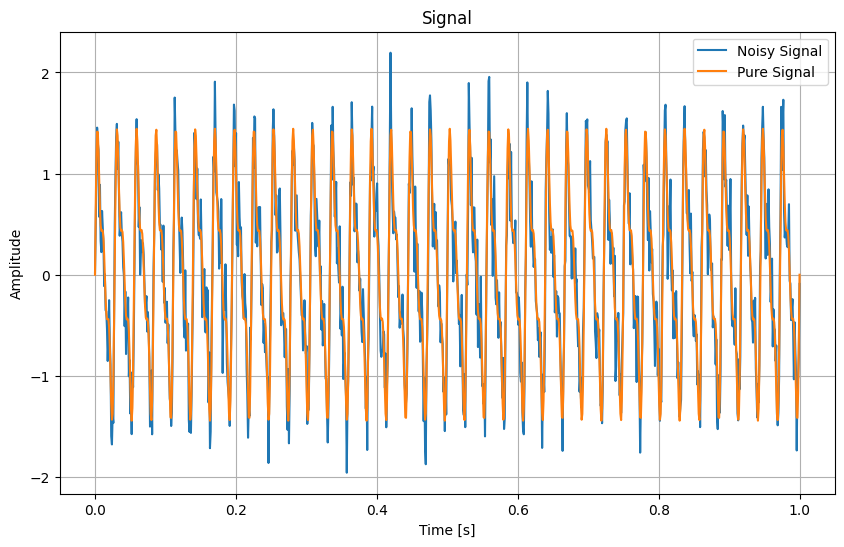

In [71]:
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs)

f = 36 # base signal
signal_base = np.sin(2 * np.pi * f * t)
signal_harmonic_1 = np.sin(2 * np.pi * 2 * f * t) /2
signal_harmonic_2 = np.sin(2 * np.pi * 3 * f * t) /3

signal = signal_base + signal_harmonic_1 + signal_harmonic_2

noise = np.random.randn(len(t))/4

noisy_signal = signal + noise

plt.figure(figsize=(10, 6))
plt.plot(t, noisy_signal, ms=1, label="Noisy Signal")
plt.plot(t, signal, ms=3, label="Pure Signal")
plt.legend()
plt.title("Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

In [72]:
# $y[n] = \sum_{k=0}^M b_k x\[n − k\]$
def fir_filter(x, b):
    """
    FIR filter implementation.
    
    Parameters:
    x : ndarray
        Input signal.
    b : ndarray
        Filter coefficients.
    
    Returns:
    y : ndarray
        Filtered output signal.
    """
    M = len(b)  # Number of coefficients
    y = np.convolve(x, b, mode='full')[:len(x)]  # Apply filter
    return y

# $y[n] = \sum_{k=0}^M b_k x[n − k] - \sum_{k=1}^N a_k y[n − k]$
def iir_filter(x, b, a):
    """
    FIR filter implementation.
    
    Parameters:
    x : ndarray
        Input signal.
    b : ndarray
        Filter coefficients.
    a : ndarray
        Denominator coefficients.
        
    Returns:
    y : ndarray
        Filtered output signal.
    """
    return lfilter(b, a, x)


def lms_filter(x, d, mu, num_taps):
    """
    LMS adaptive filter implementation.
    
    Parameters:
    x : ndarray
        Input signal (noisy).
    d : ndarray
        Desired signal.
    mu : float
        Step size.
    num_taps : int
        Number of filter taps.
    
    Returns:
    y : ndarray
        Filtered output signal.
    e : ndarray
        Error signal.
    w : ndarray
        Final filter weights.
    """
    n = len(x)
    w = np.zeros(num_taps)
    y = np.zeros(n)
    e = np.zeros(n)

    for i in range(num_taps, n):
        x_segment = x[i-num_taps:i][::-1]
        y[i] = np.dot(w, x_segment)
        e[i] = d[i] - y[i]
        w += mu * e[i] * x_segment
    
    return y, e, w

In [73]:
fir_filtered = fir_filter(noisy_signal,fir_b)
iir_filtered = iir_filter(noisy_signal, iir_b, iir_a)
lms_filtered, e, w = lms_filter(noisy_signal, signal, lms_mu, lms_m)

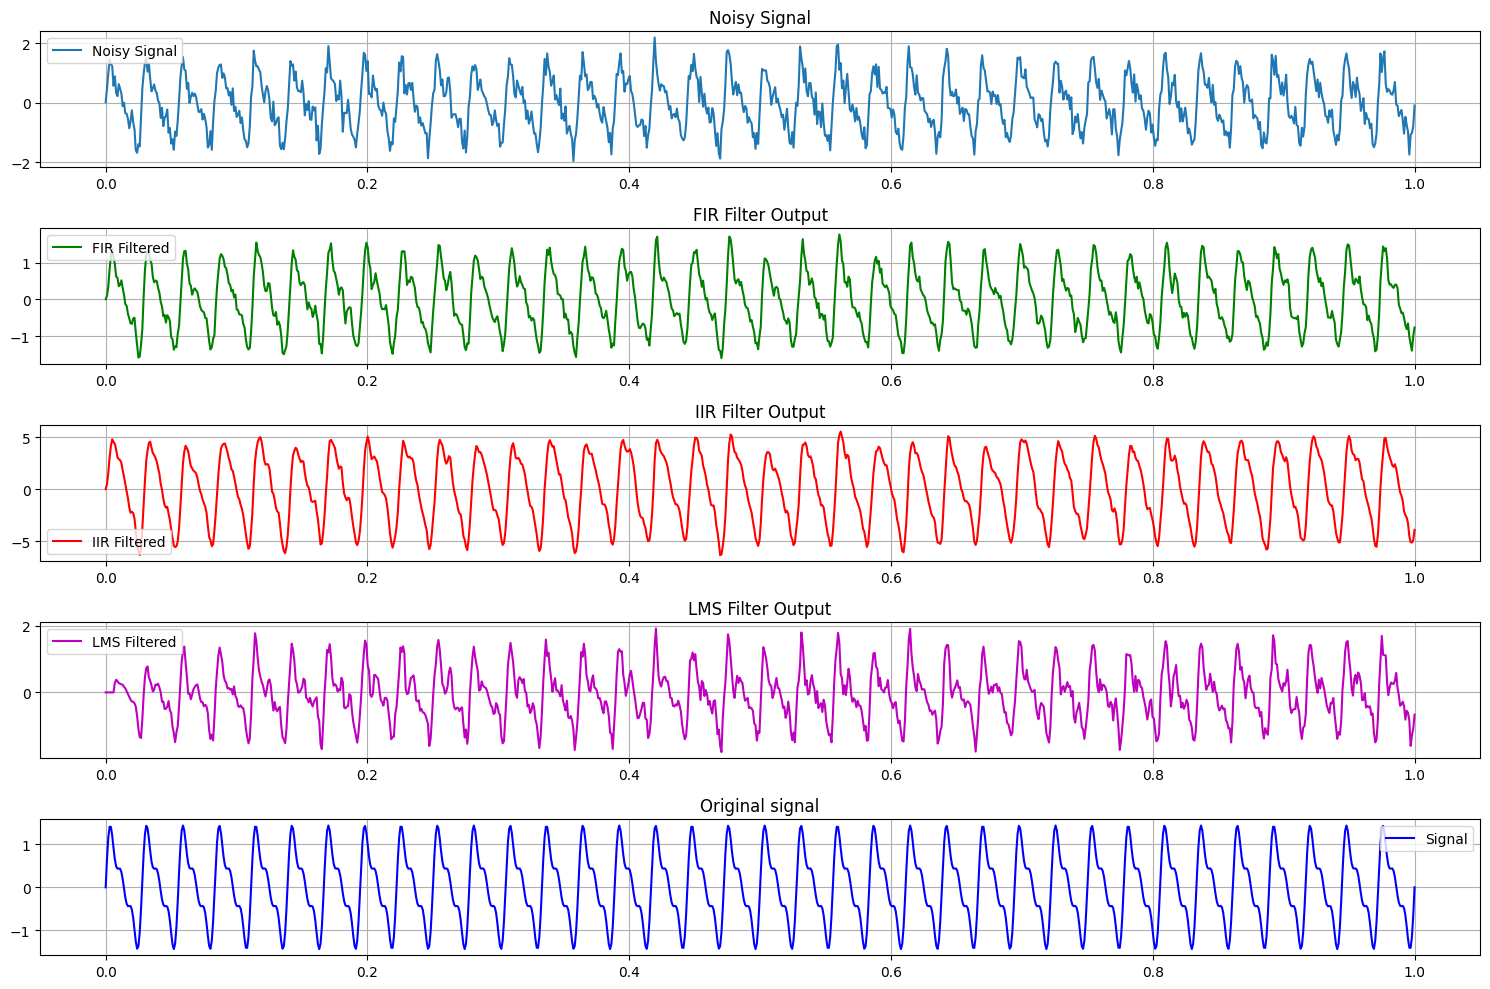

In [74]:
plt.figure(figsize=(15, 10))

plt.subplot(5, 1, 1)
plt.plot(t, noisy_signal, label='Noisy Signal')
plt.title("Noisy Signal")
plt.grid()
plt.legend()

plt.subplot(5, 1, 2)
plt.plot(t, fir_filtered, label='FIR Filtered', color='g')
plt.title("FIR Filter Output")
plt.grid()
plt.legend()

plt.subplot(5, 1, 3)
plt.plot(t, iir_filtered, label='IIR Filtered', color='r')
plt.title("IIR Filter Output")
plt.grid()
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(t, lms_filtered, label='LMS Filtered', color='m')
plt.title("LMS Filter Output")
plt.grid()
plt.legend()

plt.subplot(5, 1, 5)
plt.plot(t, signal, label='Signal', color='b')
plt.title("Original signal")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

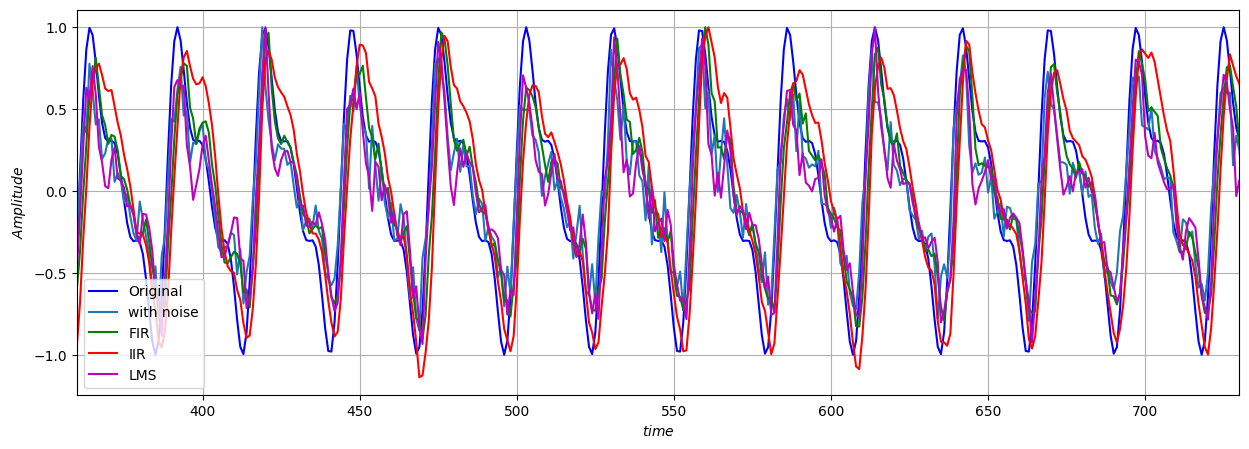

In [80]:
plt.figure(figsize=(15, 5))

plt.plot(signal / max(signal), ms=3, label='Original', color='b')
plt.plot(noisy_signal / max(noisy_signal), ms=3, label='with noise')
plt.plot(fir_filtered / max(fir_filtered), ms=3, label='FIR', color='g')
plt.plot(iir_filtered / max(iir_filtered), ms=3, label='IIR', color='r')
plt.plot(lms_filtered / max(lms_filtered), ms=3, label='LMS', color='m')
plt.xlabel('$time$')
plt.ylabel('$Amplitude$')
plt.xlim(360,730)
plt.legend()
plt.grid()

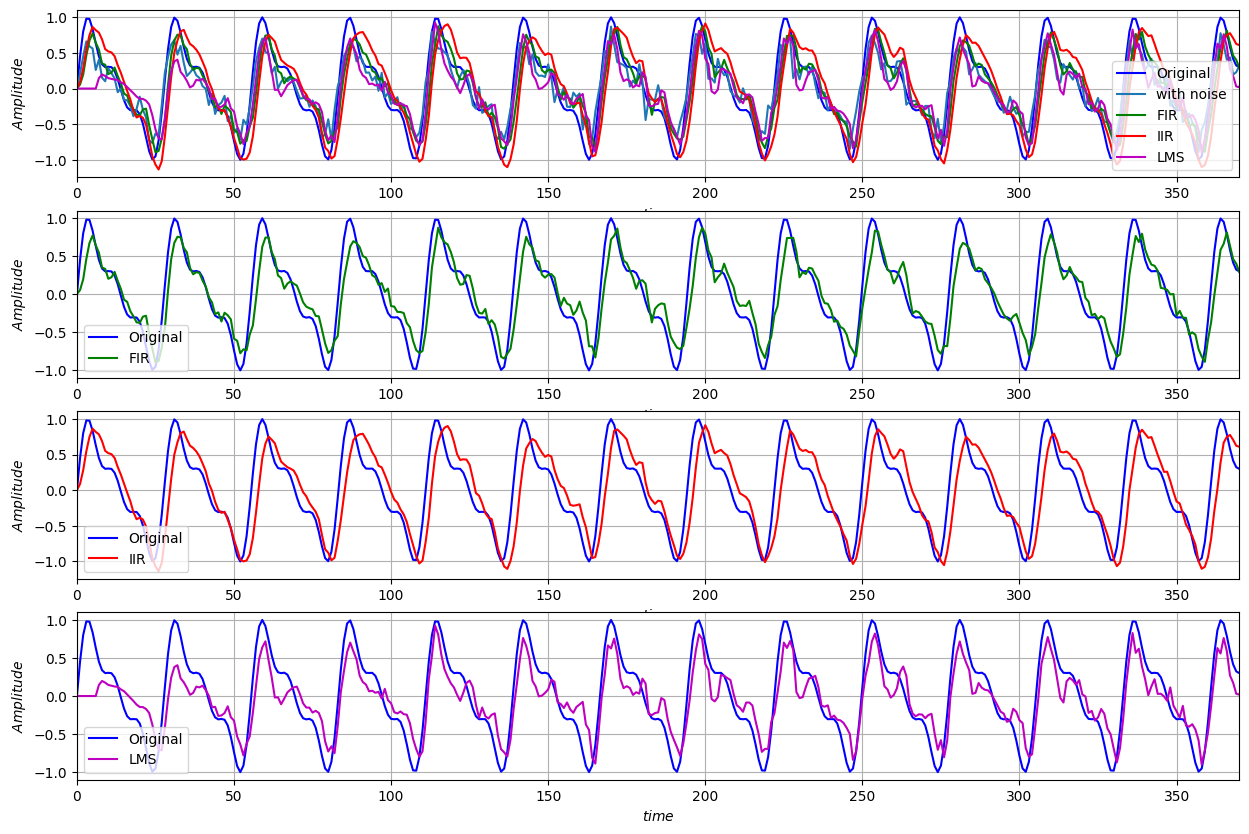

In [81]:
plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(signal / max(signal), ms=3, label='Original', color='b')
plt.plot(noisy_signal / max(noisy_signal), ms=3, label='with noise')
plt.plot(fir_filtered / max(fir_filtered), ms=3, label='FIR', color='g')
plt.plot(iir_filtered / max(iir_filtered), ms=3, label='IIR', color='r')
plt.plot(lms_filtered / max(lms_filtered), ms=3, label='LMS', color='m')
plt.xlabel('$time$')
plt.ylabel('$Amplitude$')
plt.xlim(0,370)
plt.legend()
plt.grid()

plt.subplot(4, 1, 2)
plt.plot(signal / max(signal), ms=3, label='Original', color='b')
plt.plot(fir_filtered / max(fir_filtered), ms=3, label='FIR', color='g')
plt.xlabel('$time$')
plt.ylabel('$Amplitude$')
plt.xlim(0,370)
plt.legend()
plt.grid()

plt.subplot(4, 1, 3)
plt.plot(signal / max(signal), ms=3, label='Original', color='b')
plt.plot(iir_filtered / max(iir_filtered), ms=3, label='IIR', color='r')
plt.xlabel('$time$')
plt.ylabel('$Amplitude$')
plt.xlim(0,370)
plt.legend()
plt.grid()

plt.subplot(4, 1, 4)
plt.plot(signal / max(signal), ms=3, label='Original', color='b')
plt.plot(lms_filtered / max(lms_filtered), ms=3, label='LMS', color='m')
plt.xlabel('$time$')
plt.ylabel('$Amplitude$')
plt.xlim(0,370)
plt.legend()
plt.grid()

plt.show()